In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import glob

In [80]:
def grid_size(N, BLOCK_SIZE):
    return (N + BLOCK_SIZE - 1) // BLOCK_SIZE

def get_num_threads(N, BLOCK_SIZE):
    gs = grid_size(N, BLOCK_SIZE) 
    gs = gs * gs
    return gs * BLOCK_SIZE * BLOCK_SIZE

num_threads = get_num_threads(256, 22)
print(num_threads)

69696


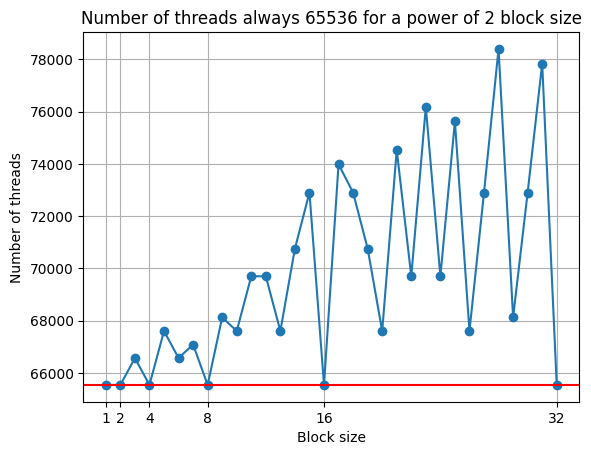

In [81]:
x = list(range(1,33))

y=[]
for i in range(1,33):
    y.append(get_num_threads(256, i))

plt.title("Number of threads always 65536 for a power of 2 block size")
plt.grid()
# marker should be o
plt.plot(x,y, marker='o')
# hline in 65536
plt.axhline(y=65536, color='r', linestyle='-', label="65536")
plt.xlabel("Block size")
plt.ylabel("Number of threads")
# x ticks should only be power of 2.
plt.xticks([1,2,4,8,16,32])
plt.savefig("../report/img/num_threads.png")

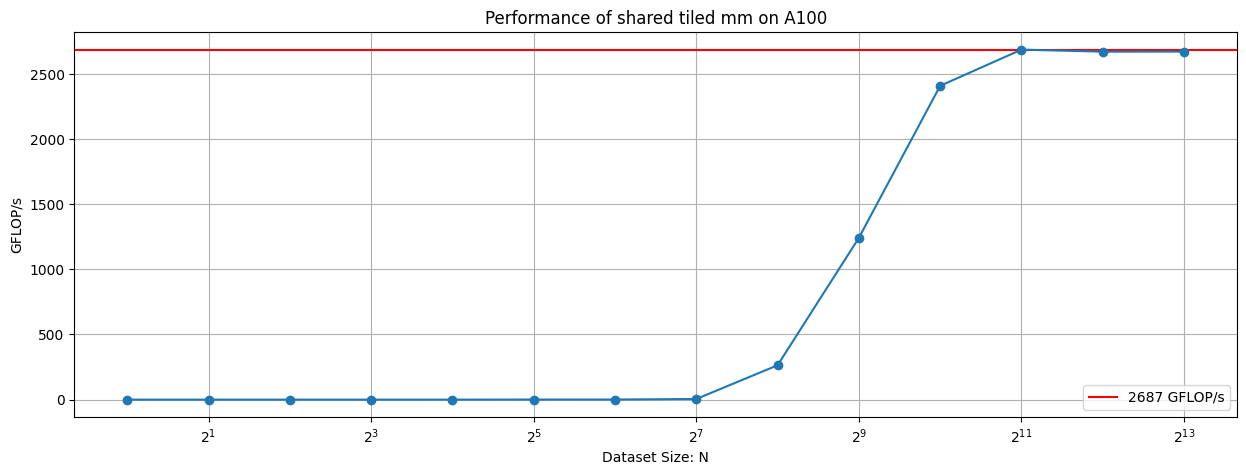

In [70]:
filename = "results/3c.txt"
Ns = []
MFLOPSs = []
with open(filename, "r") as f:
    lines = f.readlines()
    for line in lines:
        N = int(math.sqrt(int(line.split("N*N=")[1].split(")")[0])))
        Ns.append(N)
        MFLOPS = float(line.split(":")[1])
        MFLOPSs.append(MFLOPS/1000)

        
# set x axis to log2 scale
maxFLOP = max(MFLOPSs)
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
ax.grid()
ax.axhline(y=maxFLOP, color='r', linestyle='-', label=f"{maxFLOP:.0f} GFLOP/s")
plt.xscale('log', base=2)
ax.plot(Ns, MFLOPSs, marker='o')
plt.xlabel("Dataset Size: N")
# set y label for ax
ax.set_ylabel("GFLOP/s")

plt.legend()
plt.title("Performance of shared tiled mm on A100")
plt.savefig("../report/img/tiled_matrix_multiplication.png")

results/3b_2.txt
results/3b_4.txt
results/3b_8.txt
results/3b_16.txt
results/3b_32.txt


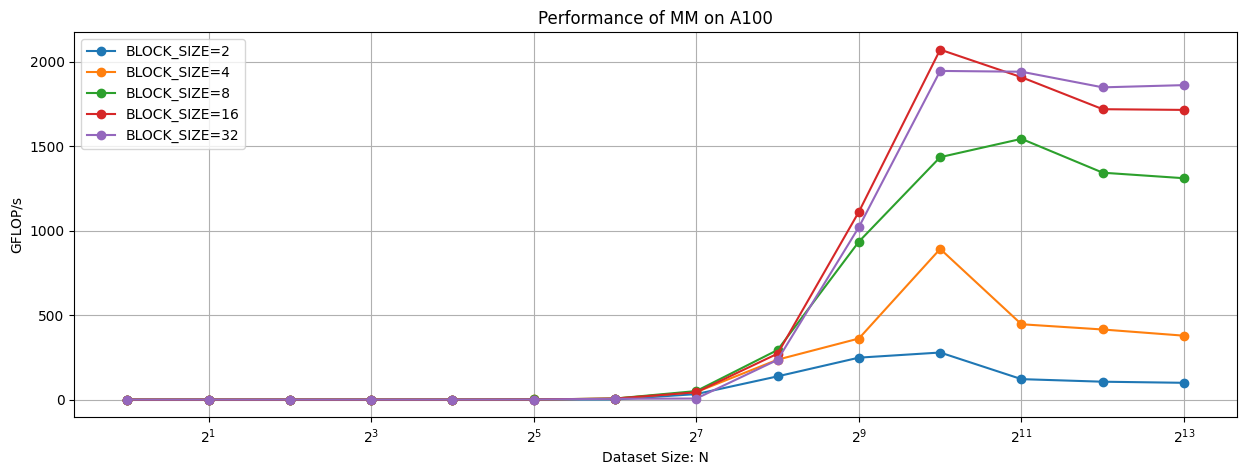

In [82]:

filenames=glob.glob("results/3b_*.txt")

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
ax.grid()
plt.xscale('log', base=2)
plt.xlabel("Dataset Size: N")
ax.set_ylabel("GFLOP/s")
for filename in filenames:
    print(filename)
    TILE_SIZE=int(filename.split("_")[1].split(".")[0])
    Ns = []
    MFLOPSs = []
    with open(filename, "r") as f:
        lines = f.readlines()
        for line in lines:
            N = int(math.sqrt(int(line.split("N*N=")[1].split(")")[0])))
            Ns.append(N)
            MFLOPS = float(line.split(":")[1])
            MFLOPSs.append(MFLOPS/1000)

            
    # set x axis to log2 scale
    maxFLOP = max(MFLOPSs)
    ax.plot(Ns, MFLOPSs, marker='o', label=f"BLOCK_SIZE={TILE_SIZE}")

plt.legend()
plt.title("Performance of MM on A100")
plt.savefig("../report/img/block_size_matrix_multiplication.png")

results/3d_shared.txt
results/3d_unshared.txt


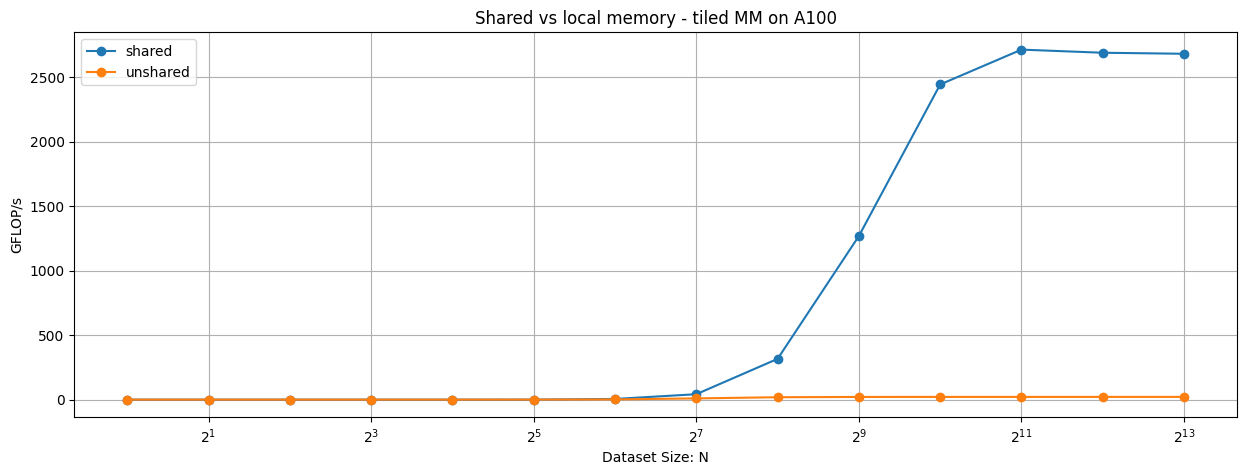

In [78]:
filenames=glob.glob("results/3d_*.txt")

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
ax.grid()
plt.xscale('log', base=2)
plt.xlabel("Dataset Size: N")
ax.set_ylabel("GFLOP/s")
for filename in filenames:
    print(filename)
    share=filename.split("_")[1].split(".")[0]
    Ns = []
    MFLOPSs = []
    with open(filename, "r") as f:
        lines = f.readlines()
        for line in lines:
            N = int(math.sqrt(int(line.split("N*N=")[1].split(")")[0])))
            Ns.append(N)
            MFLOPS = float(line.split(":")[1])
            MFLOPSs.append(MFLOPS/1000)

            
    # set x axis to log2 scale
    ax.plot(Ns, MFLOPSs, marker='o', label=f"{share}")

plt.legend()
plt.title("Shared vs local memory - tiled MM on A100")
plt.savefig("../report/img/shared_vs_local.png")

results/3e_pinned.txt
results/3e_unpinned.txt


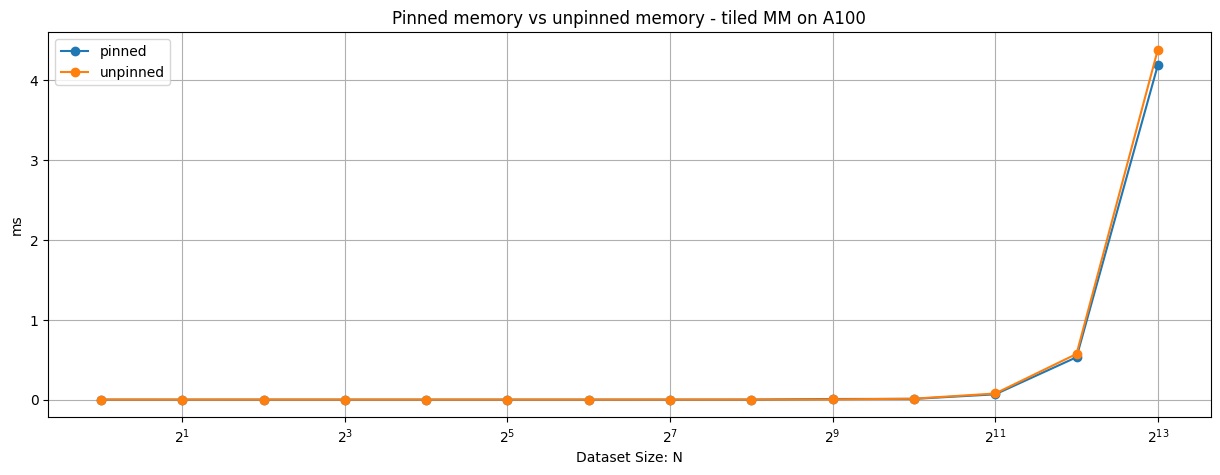

In [4]:
filenames=glob.glob("results/3e_*.txt")

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
ax.grid()
plt.xscale('log', base=2)
plt.xlabel("Dataset Size: N")
ax.set_ylabel("ms")
for filename in filenames:
    print(filename)
    share=filename.split("_")[1].split(".")[0]
    Ns = []
    MFLOPSs = []
    with open(filename, "r") as f:
        lines = f.readlines()
        for line in lines:
            N = int(math.sqrt(int(line.split("N*N=")[1].split(")")[0])))
            Ns.append(N)
            MFLOPS = float(line.split(":")[1])
            MFLOPSs.append(MFLOPS)

            
    # set x axis to log2 scale
    ax.plot(Ns, MFLOPSs, marker='o', label=f"{share}")

plt.legend()
plt.title("Pinned memory vs unpinned memory - tiled MM on A100")
plt.savefig("../report/img/pinned_vs_unpinned.png")

s